# Cardiovascular diseases

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn scikit-learn plotly
!pip install --upgrade nbformat

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
heart = pd.read_csv('heart.csv', index_col=None, na_values=['nan'],)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(heart.shape)
print(heart.dtypes)

(918, 12)
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [5]:
# Check for null values
for col in heart.columns:
    print(col, heart[col].isnull().sum())

Age 0
Sex 0
ChestPainType 0
RestingBP 0
Cholesterol 0
FastingBS 0
RestingECG 0
MaxHR 0
ExerciseAngina 0
Oldpeak 0
ST_Slope 0
HeartDisease 0


In [6]:
string_col = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
not_string_col = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
heart[string_col] = heart[string_col].astype('string')
heart[not_string_col] = heart[not_string_col].astype('float64')
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
# There is one record with RestingBP = 0, which is impossible. 
# We should change it to nan and then impute it later.
heart['RestingBP'] = heart['RestingBP'].replace(0, np.nan)

In [8]:
heart[heart['Cholesterol'] == 0].shape
# There are a lot of records with Cholesterol = 0, which is impossible too.
heart['Cholesterol'] = heart['Cholesterol'].replace(0, np.nan)

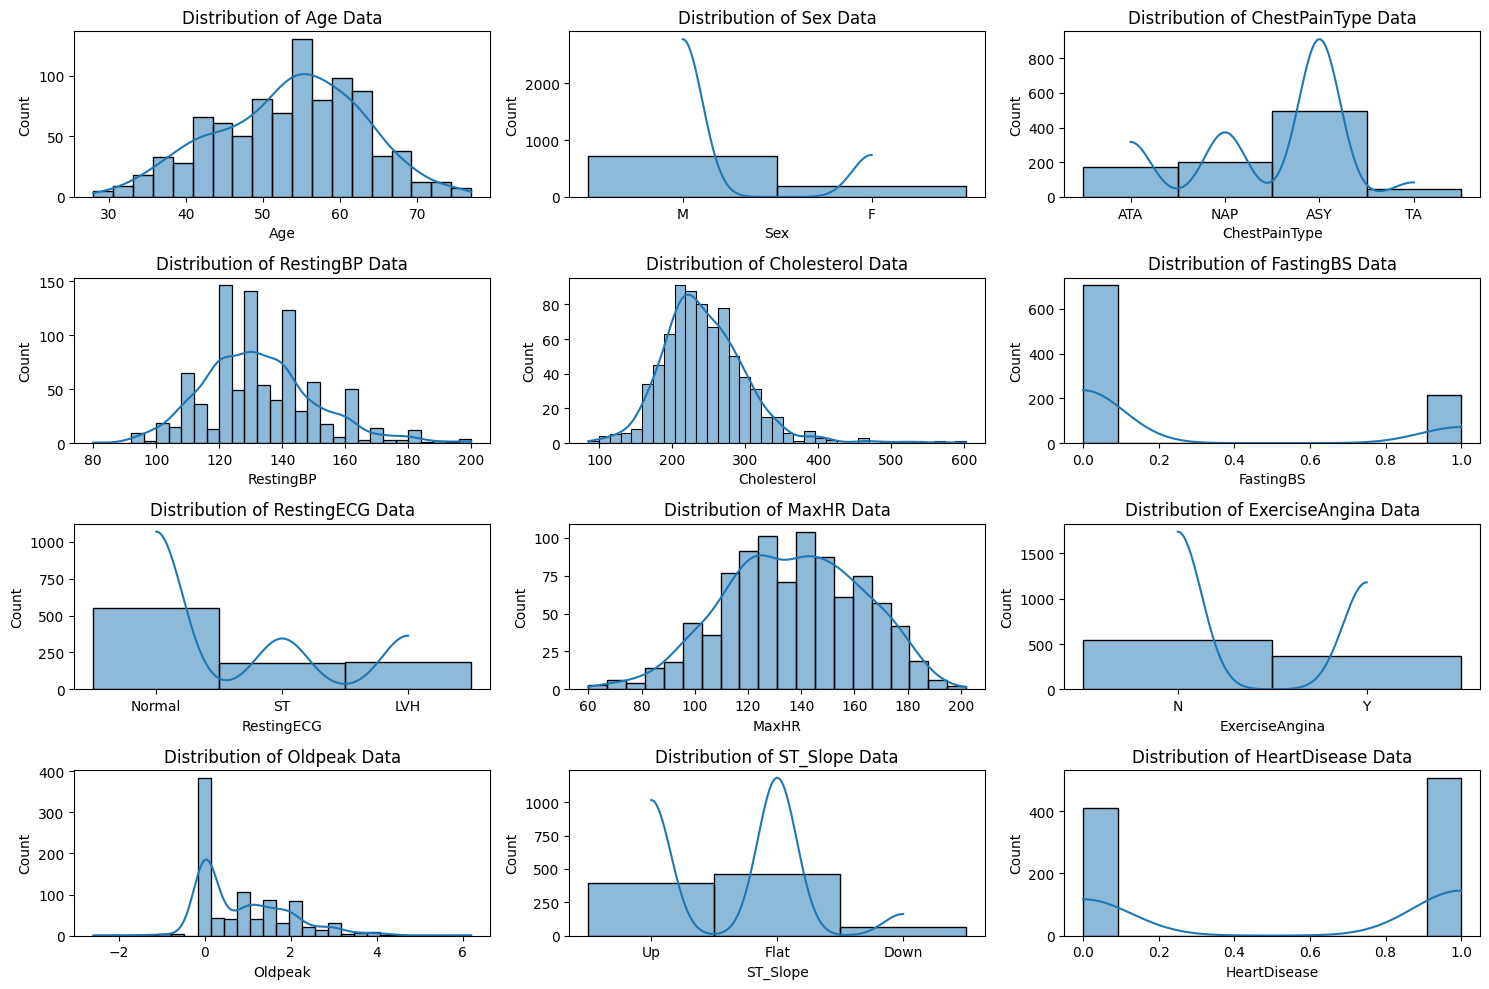

In [9]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(heart[col],kde=True)
    plt.tight_layout()
    plt.plot()

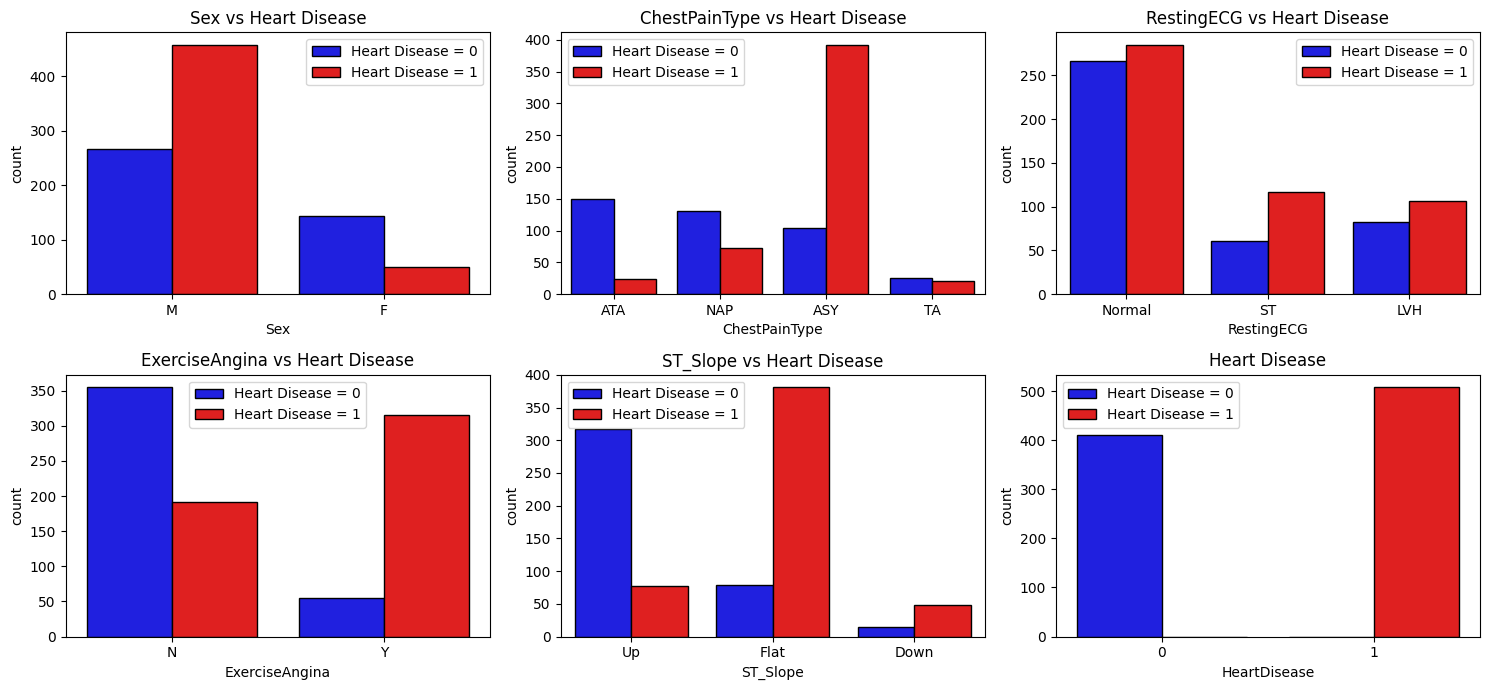

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))

# For categorical variables
for i, col in enumerate(heart[string_col].columns):
    plt.subplot(2, 3, i + 1)
    plt.title(f"{col} vs Heart Disease")
    sns.countplot(x=col, data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
    plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
    plt.tight_layout()

plt.subplot(2, 3, 6)
plt.title("Heart Disease")
sns.countplot(x='HeartDisease', data=heart, hue="HeartDisease", palette=["blue", "red"], edgecolor='black')
plt.legend(['Heart Disease = 0', 'Heart Disease = 1'])
plt.tight_layout()

plt.show()

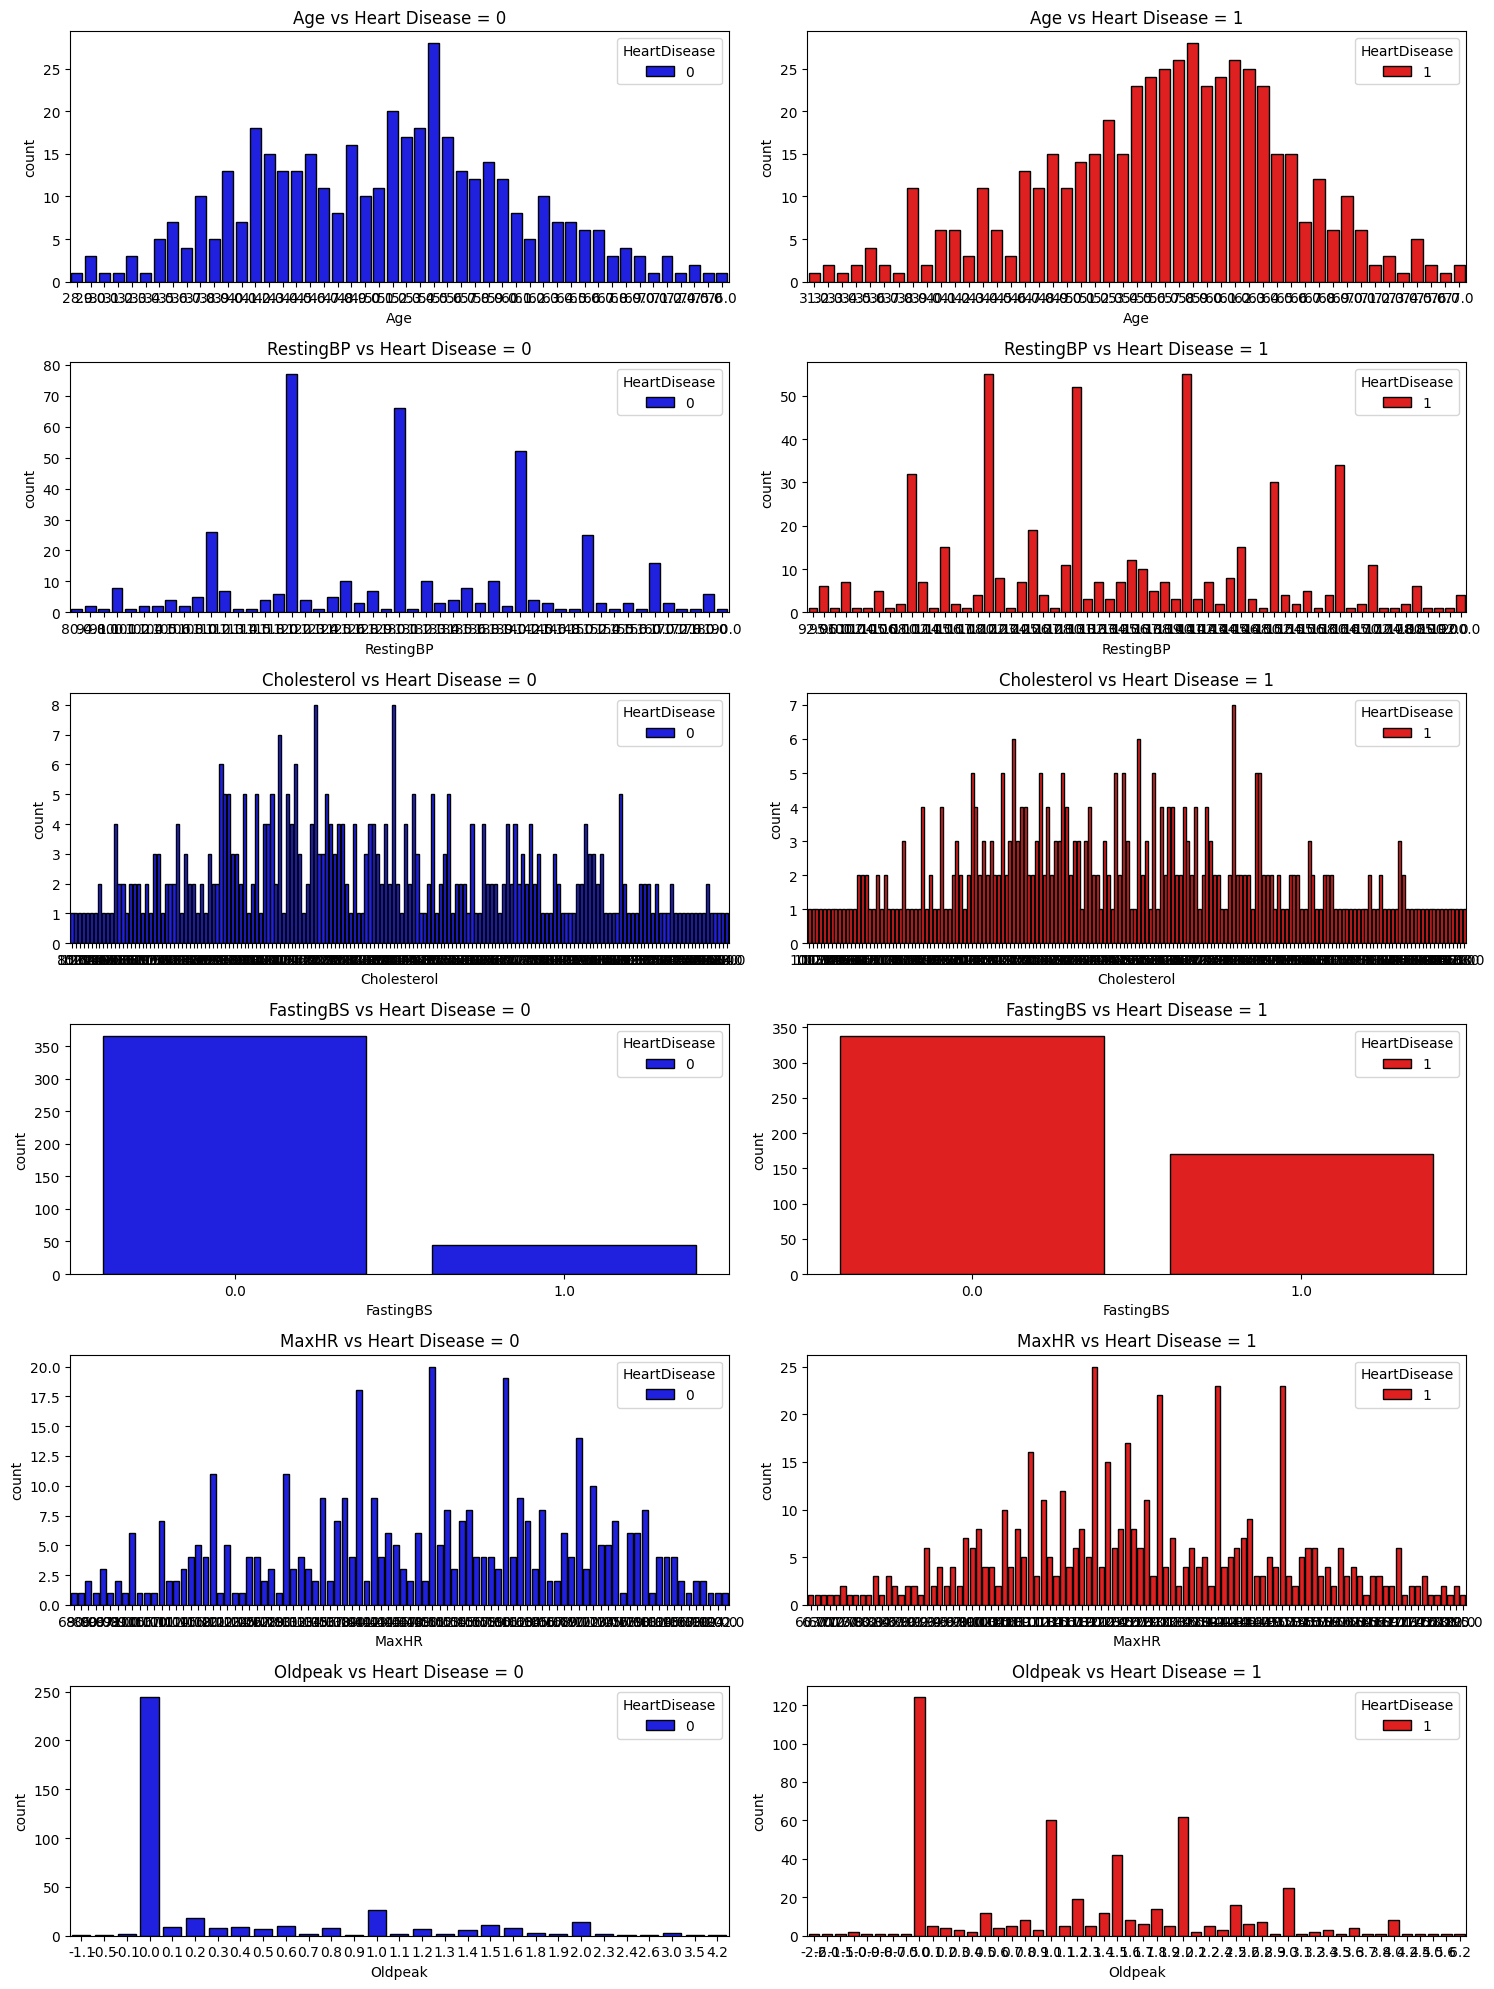

In [11]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# For numerical variables
numerical_cols = heart[not_string_col].columns
num_rows, num_cols = ax.shape

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i*2 + 1)
    plt.title(f"{col} vs Heart Disease = 0")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 0], hue="HeartDisease", palette=["blue"], edgecolor='black')
    
    plt.subplot(num_rows, num_cols, i*2 + 2)
    plt.title(f"{col} vs Heart Disease = 1")
    sns.countplot(x=col, data=heart[heart['HeartDisease'] == 1], hue="HeartDisease", palette=["red"], edgecolor='black')

plt.tight_layout()
plt.show()


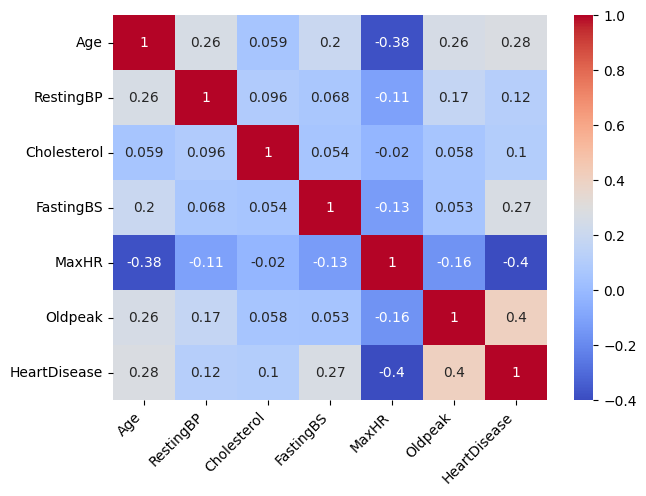

In [12]:
corr = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
plt.figure(figsize=(7, 5))
heatmap = sns.heatmap(heart[corr].corr(), annot=True, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.show()


In [13]:
#unique values in each categorical column
for col in string_col:
    print(f"{col} has {heart[col].nunique()} unique values: {heart[col].unique()}")
    print("")

Sex has 2 unique values: <StringArray>
['M', 'F']
Length: 2, dtype: string

ChestPainType has 4 unique values: <StringArray>
['ATA', 'NAP', 'ASY', 'TA']
Length: 4, dtype: string

RestingECG has 3 unique values: <StringArray>
['Normal', 'ST', 'LVH']
Length: 3, dtype: string

ExerciseAngina has 2 unique values: <StringArray>
['N', 'Y']
Length: 2, dtype: string

ST_Slope has 3 unique values: <StringArray>
['Up', 'Flat', 'Down']
Length: 3, dtype: string



In [14]:
#Label Encoding for categorical columns with 2 unique values
le = preprocessing.LabelEncoder()
col_2v = ['Sex', 'ExerciseAngina']
for col in col_2v:
    heart[col] = le.fit_transform(heart[col])

In [15]:
minmax_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

We have 2 options for data scaling : 
- 1) Normalization 
- 2) Standardization 

As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
- Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
- Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.

In [16]:
# Scale the Oldpeak feature using MinMaxScaler
heart['Oldpeak'] = minmax_scaler.fit_transform(heart[['Oldpeak']])

# Scale the rest of the numerical features using StandardScaler
for col in not_string_col:
    if col != 'Oldpeak' and col != 'Age':
        heart[col] = standard_scaler.fit_transform(heart[[col]])

In [17]:
heart_tree = heart.copy()

For NON-TREE BASED ALGORITHMS:

In [18]:
# One-hot encoding for categorical columns with more than 2 unique values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), column_name)], remainder='passthrough')
heart = np.array(ct.fit_transform(heart))

In [19]:
# KNN imputation for missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=7)
heart = imputer.fit_transform(heart)

In [20]:
feature = heart[:, :-1]
target = heart[:, -1]

In [21]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.25, random_state=918*12)

For TREE BASED ALGORITHMS:

In [22]:
#Label Encoding for other categorical columns
le = preprocessing.LabelEncoder()
col_name = ['ChestPainType', 'RestingECG', 'ST_Slope']
for col in col_name:
    heart_tree[col] = le.fit_transform(heart_tree[col])

In [23]:
# Specify the columns to exclude from imputation
exclude_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Perform imputation on the remaining columns
heart_tree_imputed = imputer.fit_transform(heart_tree.drop(exclude_columns, axis=1))

# Create a dataframe of the imputed columns
heart_tree_imputed = pd.DataFrame(heart_tree_imputed, columns=heart_tree.drop(exclude_columns, axis=1).columns)

# Concatenate the imputed columns with the excluded columns
heart_tree_imputed = pd.concat([heart_tree_imputed, heart_tree[exclude_columns]], axis=1)

In [24]:
#feature and target
target_tree = heart_tree_imputed['HeartDisease']
feature_tree = heart_tree_imputed.drop('HeartDisease', axis=1)

In [25]:
#splitting the data into training and testing
feature_train_tree, feature_test_tree, target_train_tree, target_test_tree = train_test_split(feature_tree, target_tree, 
                                                                                              test_size=0.25, random_state=918*12)

Modeling

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold

DISTANCE-BASED ALGORITHMS:

Best k value: 1
Accuracy for best k value: 0.914471596318629
Classification Report for Best k value (1):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        67
         1.0       1.00      1.00      1.00        70

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

Average Confusion Matrix:
[[50.06 13.14]
 [10.4  64.  ]]


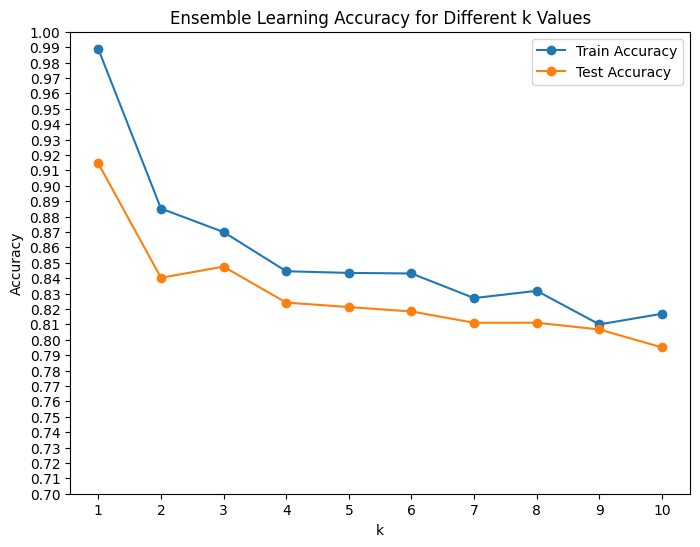

In [27]:
from sklearn.neighbors import KNeighborsClassifier

feature_train = np.array(feature_train)
target_train = np.array(target_train)

# Define the number of base classifiers in the ensemble
num_classifiers = 7
num_folds = 5  # Number of folds for cross-validation

# Create empty lists to store the ensemble accuracies for training and test sets
ensemble_train_accuracies = []
ensemble_test_accuracies = []
fold_confusion_matrices = []

k_values = [k for k in range(1, 11, 1)]
classification_reports = {}  # Dictionary to store classification reports for each k value

for k in k_values:
    # Create an empty list to store the base classifiers
    classifiers = []

    # Perform k-fold cross-validation
    kf = KFold(n_splits=num_folds)
    fold_train_accuracies = []
    fold_test_accuracies = []

    for train_index, test_index in kf.split(feature_train):
        fold_feature_train, fold_feature_test = feature_train[train_index], feature_train[test_index]
        fold_target_train, fold_target_test = target_train[train_index], target_train[test_index]

        # Train the base classifiers on different subsets of the training data
        for i in range(num_classifiers):
            classifier = KNeighborsClassifier(n_neighbors=k)
            subset_indices = np.random.choice(len(fold_feature_train), size=int(0.8 * len(fold_feature_train)),
                                               replace=False)
            subset_features = fold_feature_train[subset_indices]
            subset_targets = fold_target_train[subset_indices]
            classifier.fit(subset_features, subset_targets)
            classifiers.append(classifier)

        # Make predictions using each base classifier and calculate their weights based on accuracy
        weights = []
        train_predictions = []
        test_predictions = []

        for classifier in classifiers:
            train_pred = classifier.predict(fold_feature_train)
            test_pred = classifier.predict(fold_feature_test)
            train_accuracy = accuracy_score(fold_target_train, train_pred)
            test_accuracy = accuracy_score(fold_target_test, test_pred)
            weight = train_accuracy / sum(train_accuracy for classifier in classifiers)
            weights.append(weight)
            train_predictions.append(train_pred)
            test_predictions.append(test_pred)

        # Combine the predictions using weighted voting for training set
        ensemble_train_predictions = np.zeros_like(train_predictions[0], dtype=np.float64)

        for i in range(len(classifiers)):
            ensemble_train_predictions += weights[i] * train_predictions[i]

        ensemble_train_predictions = np.round(ensemble_train_predictions)

        # Combine the predictions using weighted voting for test set
        ensemble_test_predictions = np.zeros_like(test_predictions[0], dtype=np.float64)

        for i in range(len(classifiers)):
            ensemble_test_predictions += weights[i] * test_predictions[i]

        ensemble_test_predictions = np.round(ensemble_test_predictions)

        # Evaluate the ensemble's accuracy for training and test sets
        ensemble_train_accuracy = accuracy_score(fold_target_train, ensemble_train_predictions)
        ensemble_test_accuracy = accuracy_score(fold_target_test, ensemble_test_predictions)
        fold_train_accuracies.append(ensemble_train_accuracy)
        fold_test_accuracies.append(ensemble_test_accuracy)

        # Calculate and store the confusion matrix for the current fold
        fold_confusion_matrix = confusion_matrix(fold_target_test, ensemble_test_predictions)
        fold_confusion_matrices.append(fold_confusion_matrix)

    # Calculate the average accuracy across all folds
    average_train_accuracy = np.mean(fold_train_accuracies)
    average_test_accuracy = np.mean(fold_test_accuracies)
    ensemble_train_accuracies.append(average_train_accuracy)
    ensemble_test_accuracies.append(average_test_accuracy)

    # Store the classification report for the current k value
    report = classification_report(fold_target_test, ensemble_test_predictions)
    classification_reports[k] = report

# Best k value for the ensemble model based on test accuracy
best_k = k_values[ensemble_test_accuracies.index(max(ensemble_test_accuracies))]
print(f'Best k value: {best_k}')
print(f'Accuracy for best k value: {max(ensemble_test_accuracies)}')

# Print the classification report for the best k value
best_k_report = classification_reports[best_k]
print(f'Classification Report for Best k value ({best_k}):')
print(best_k_report)

# Calculate the average confusion matrix across all folds
average_confusion_matrix = np.mean(fold_confusion_matrices, axis=0)
print('Average Confusion Matrix:')
print(average_confusion_matrix)

# Plot the ensemble accuracies for different k values
plt.figure(figsize=(8, 6))
plt.plot(k_values, ensemble_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(k_values, ensemble_test_accuracies, marker='o', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Ensemble Learning Accuracy for Different k Values')
plt.legend()
plt.xticks(k_values)
plt.yticks(np.arange(0.7, 1.01, 0.01))  # Set y-axis ticks from 0.7 to 1 with a step of 0.01
plt.ylim(0.7, 1)
plt.show()


Best Accuracy: 85.17%
Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


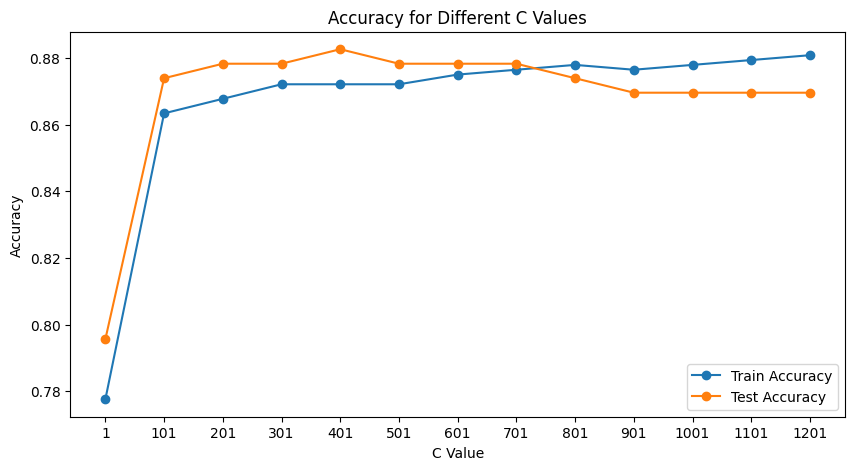

Confusion Matrix:
 [[ 80  14]
 [ 14 122]]
Train Accuracy: 87.21%
Test Accuracy: 87.83%
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        94
         1.0       0.90      0.90      0.90       136

    accuracy                           0.88       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.88      0.88       230

Accuracy: 85.46%
Standard Deviation: 2.01%


In [28]:
#grid search for best parameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}]
grid_search = GridSearchCV(estimator=svm, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(feature_train, target_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

#using SVM model with accuracy score for different C values for both train and test set and plotting the graph
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
c_range = range(1, 1300, 100)
train_accuracy = []
test_accuracy = []
for c in c_range:
    svm = SVC(C=c,kernel='rbf',gamma=0.001)
    svm.fit(feature_train, target_train)
    train_pred = svm.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = svm.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy,marker='o', label='Train Accuracy')
plt.plot(c_range, test_accuracy, marker='o', label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values')
plt.legend()
plt.show()

#svm with best parameters
svm = SVC(C=500,kernel='rbf',gamma=0.001)
svm.fit(feature_train, target_train)
target_pred = svm.predict(feature_test)
cm = confusion_matrix(target_test, target_pred)
print('Confusion Matrix:\n', cm)

#print the accuracy score of train and test data
print('Train Accuracy: {:.2f}%'.format(accuracy_score(target_train, svm.predict(feature_train))*100))
print('Test Accuracy: {:.2f}%'.format(accuracy_score(target_test, target_pred)*100))

#precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

#k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svm, X=feature_train, y=target_train, cv=5)
print('Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

0.8695652173913043
0.8782608695652174
0.8869565217391304
0.8869565217391304
0.8782608695652174
0.8521739130434782
0.8608695652173913


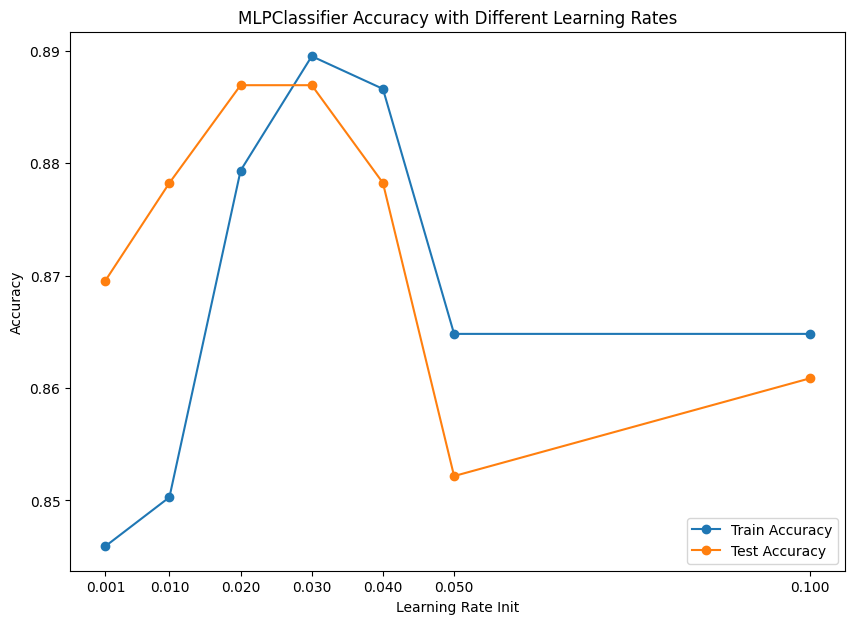

Confusion Matrix:
 [[ 81  13]
 [ 13 123]]
Train Accuracy: 87.94%
Test Accuracy: 88.70%
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        94
         1.0       0.90      0.90      0.90       136

    accuracy                           0.89       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.89      0.89      0.89       230

Best Accuracy: 85.61%
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100, 100, 100), 'learning_rate': 'adaptive', 'learning_rate_init': 0.04, 'solver': 'adam'}


In [45]:
from sklearn.neural_network import MLPClassifier

feature_train = np.array(feature_train)
target_train = np.array(target_train)
layers = [(80),(80,60),(80,60,80),(100,100,100),(100,100,100,100),(100,100,100,100,100)]
lri = [0.001, 0.01,0.02, 0.03,0.04,0.05,0.1]

#Grid search for best parameters
from sklearn.model_selection import GridSearchCV
mlp = MLPClassifier()
parameters = [{'hidden_layer_sizes': layers, 'activation': ['relu'], 'solver': ['adam'], 'alpha': [0.0001, 0.05],
                'learning_rate': ['constant','adaptive'], 'learning_rate_init': lri}]
grid_search = GridSearchCV(estimator=mlp, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(feature_train, target_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)

# Create empty lists to store the results
results = []
test_accuracies = []
train_accuracies = []
fold_confusion_matrices = []
for l in lri:
    mlp = MLPClassifier(hidden_layer_sizes = (100,100,100),activation="relu", learning_rate_init=l, max_iter=1000, alpha=0.0001, solver='adam',
                        verbose=False, random_state=21, tol=1e-4)
    mlp.fit(feature_train, target_train)
    train_pred = mlp.predict(feature_train)
    train_accuracies.append(accuracy_score(target_train, train_pred))
    test_pred = mlp.predict(feature_test)
    test_accuracies.append(accuracy_score(target_test, test_pred))
    #get Accuracy
    print(accuracy_score(target_test, test_pred))

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(lri, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(lri, test_accuracies, marker='o', label='Test Accuracy')
plt.xticks(lri)

plt.xlabel('Learning Rate Init')
plt.ylabel('Accuracy')
plt.title('MLPClassifier Accuracy with Different Learning Rates')
plt.legend(loc='lower right')
plt.show()

#MLP with best parameters
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100),activation="relu", learning_rate_init=0.02, max_iter=1000, alpha=0.0001, solver='adam',
                        verbose=False, random_state=21, tol=1e-4)
mlp.fit(feature_train, target_train)
target_pred = mlp.predict(feature_test)
cm = confusion_matrix(target_test, target_pred)
print('Confusion Matrix:\n', cm)

#print the accuracy score of train and test data
print('Train Accuracy: {:.2f}%'.format(accuracy_score(target_train, mlp.predict(feature_train))*100))
print('Test Accuracy: {:.2f}%'.format(accuracy_score(target_test, target_pred)*100))

#precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))




In [47]:
#test best parameters of grid search
mlp = MLPClassifier(hidden_layer_sizes = (100,100,100,100,100),activation="relu", learning_rate_init=0.04, max_iter=1000, alpha=0.0001, solver='adam',learning_rate='adaptive',
                        verbose=False, random_state=21, tol=1e-4)
mlp.fit(feature_train, target_train)
target_pred = mlp.predict(feature_test)
#get accuracy
print(accuracy_score(target_test, target_pred))
#get report
print(classification_report(target_test, target_pred))
                    

0.8782608695652174
              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84        94
         1.0       0.86      0.94      0.90       136

    accuracy                           0.88       230
   macro avg       0.88      0.86      0.87       230
weighted avg       0.88      0.88      0.88       230



c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\dnb02\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

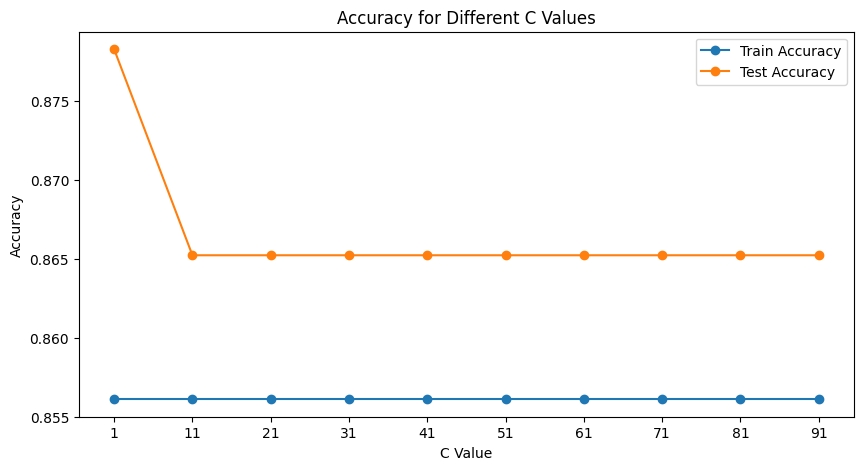

Best Accuracy: 84.87%
Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 88.26%
Cross-Validation Accuracy: 84.87%
Standard Deviation: 3.11%
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86        94
         1.0       0.90      0.90      0.90       136

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

c_range = range(1, 101, 10)
train_accuracy = []
test_accuracy = []

for c in c_range:
    lr = LogisticRegression(C=c, penalty='l1', solver='saga', max_iter=1000)
    lr.fit(feature_train, target_train)
    train_pred = lr.predict(feature_train)
    train_accuracy.append(accuracy_score(target_train, train_pred))
    test_pred = lr.predict(feature_test)
    test_accuracy.append(accuracy_score(target_test, test_pred))

plt.figure(figsize=(10, 5))
plt.plot(c_range, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(c_range, test_accuracy, marker='o', label='Test Accuracy')
plt.xticks(c_range)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different C Values')
plt.legend()
plt.show()

lr = LogisticRegression()
parameters = [
    {'C': [0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'max_iter': [1000]},
    {'C': [0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'max_iter': [1000]}
]

grid_search = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
grid_search.fit(feature_train, target_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('Best Accuracy: {:.2f}%'.format(best_accuracy * 100))
print('Best Parameters:', best_parameters)

lr = LogisticRegression(**best_parameters)
lr.fit(feature_train, target_train)
test_pred = lr.predict(feature_test)
test_accuracy = accuracy_score(target_test, test_pred)
print('Test Accuracy: {:.2f}%'.format(test_accuracy * 100))

accuracies = cross_val_score(estimator=lr, X=feature_train, y=target_train, cv=10)
print('Cross-Validation Accuracy: {:.2f}%'.format(accuracies.mean() * 100))
print('Standard Deviation: {:.2f}%'.format(accuracies.std() * 100))

#classification report  
print(classification_report(target_test, test_pred))
